Классы: ['Androoper' 'Freed' 'Tempik']
Размер данных: (68, 2914)
              precision    recall  f1-score   support

   Androoper       1.00      1.00      1.00         6
       Freed       1.00      1.00      1.00         5
      Tempik       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



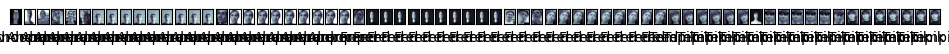

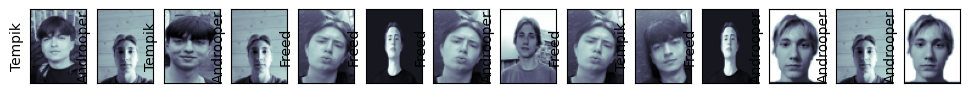

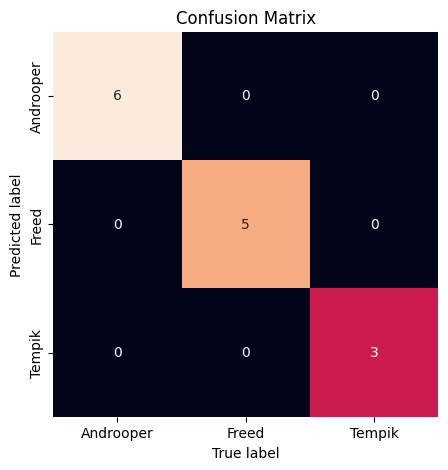

In [134]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import Bunch
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier

def predict_new(image_path, model, pca, target_size=(62, 47)):
    image = Image.open(image_path).convert('L')  
    image_resized = image.resize(target_size[::-1])
    image_array = np.array(image_resized).flatten().reshape(1, -1)

    image_pca = pca.transform(image_array)

    predicted_label_num = model.predict(image_pca)[0]
    predicted_label = faces.target_names[predicted_label_num]
    
    plt.imshow(image_array.reshape(target_size), cmap='gray')
    plt.title(f"предикт: {predicted_label}")
    plt.axis('off')
    plt.show()
    
    return predicted_label


dataset_dir = 'faces_dataset'  

def faces(dataset_dir, target_size=(62, 47)):
    images = []
    labels = []
    label_encoder = LabelEncoder()
    
    for label_folder in os.listdir(dataset_dir):
        label_path = os.path.join(dataset_dir, label_folder)
        if os.path.isdir(label_path):
            for filename in os.listdir(label_path):
                image_path = os.path.join(label_path, filename)
                if image_path.endswith('.jpg') or image_path.endswith('.png'):
                    image = Image.open(image_path).convert('L')  
                    image_resized = image.resize(target_size[::-1])  
                    images.append(np.array(image_resized).flatten())
                    labels.append(label_folder)
    
    labels = label_encoder.fit_transform(labels)
    return Bunch(data=np.array(images), target=np.array(labels), target_names=label_encoder.classes_)

faces = faces(dataset_dir)
print("Классы:", faces.target_names)
print("Размер данных:", faces.data.shape)

fig, ax = plt.subplots(1, len(faces.data), figsize=(12, 3))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.data[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])


pca = PCA(n_components=50, whiten=True, random_state=42)

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,test_size=  0.2, random_state=9)

pca.fit(Xtrain)
Xtrain_pca = pca.transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

clf = RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced', random_state=2)
clf.fit(Xtrain_pca, ytrain)
yfit = clf.predict(Xtest_pca)

fig, ax = plt.subplots(1, len(Xtest), figsize=(12, 3))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],color='black' if yfit[i] == ytest[i] else 'red')


print(classification_report(ytest, yfit, target_names=faces.target_names))

mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(5, 5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title("Confusion Matrix")
plt.show()


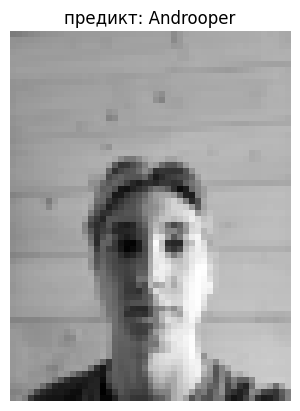

Предикт: Androoper


In [135]:

new = "lega.jpg"  
prediction = predict_new(new, clf, pca)
print(f"Предикт: {prediction}")

[0.34 0.18 0.48]


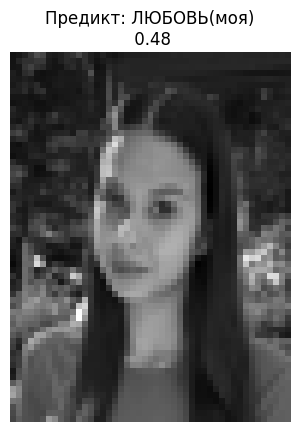

Преддикт: ЛЮБОВЬ(моя) 0.48
[0.55 0.18 0.27]


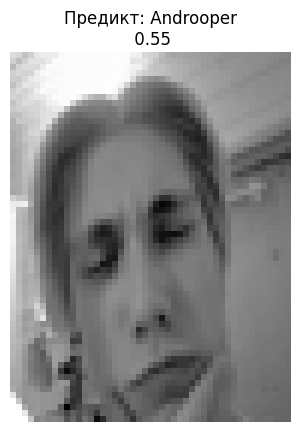

Преддикт: Androoper 0.55
[0.54 0.25 0.21]


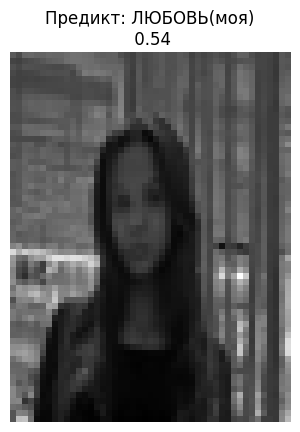

Преддикт: ЛЮБОВЬ(моя) 0.54


In [138]:
def predict_new(image_path, model, pca, target_size=(62, 47), porog=0.7):
    image = Image.open(image_path).convert('L')  
    image_res = image.resize(target_size[::-1])
    image_array = np.array(image_res).flatten().reshape(1, -1)

    image_pca = pca.transform(image_array)
    
    prob = model.predict_proba(image_pca)[0]
    print(prob)
    max_prob = np.max(prob)
    predicted_label_num = np.argmax(prob)
    
    if max_prob <= porog:
        predicted_label = "ЛЮБОВЬ(моя)"
    else:
        predicted_label = faces.target_names[predicted_label_num]
    
    plt.imshow(image_array.reshape(target_size), cmap='gray')
    plt.title(f"Предикт: {predicted_label}\n {max_prob:.2f}")
    plt.axis('off')
    plt.show()
    
    return predicted_label, max_prob



for filename in os.listdir('krutaya_idea_by_Androoper'):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_p = os.path.join('krutaya_idea_by_Androoper', filename)
        pred, prob = predict_new(image_p, clf, pca, porog=0.54 )
        print(f"Преддикт: {pred} {prob:.2f}")